In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import random as random
from scipy import stats

%load_ext autoreload
%autoreload 2

In [2]:
milk_data = pd.read_csv('../Data/TheData.csv')
milk_data['DateTime'] = pd.to_datetime(milk_data['DateTime'], errors='coerce')
milk_data['StartTime'] = pd.to_datetime(milk_data['StartTime'], format='%H:%M:%S', errors='coerce').dt.time
milk_data['StartDate'] = pd.to_datetime(milk_data['StartDate'], errors='coerce')

Merging weather and milk data: 100%|██████████| 9/9 [00:07<00:00,  1.15farm/s]


In [3]:
milk_data.head()

,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,TotalYield,DateTime,BreedName,Temperatur,Relativ fuktighet,Nederbörd,THI,THI_adj,HW,cum_HW
1,a624fb9a,SE-a624fb9a-1425,1425,2022-04-14,17:53:00,1,42.0,7.68,2022-04-14 17:53:00,01 SRB,4.2,86.8,0.0,38.221256,40.25016,0,0.0
2,a624fb9a,SE-a624fb9a-1212,1212,2022-04-14,17:45:00,5,192.0,9.58,2022-04-14 17:45:00,02 SLB,4.2,86.8,0.0,38.221256,40.25016,0,0.0
3,a624fb9a,SE-a624fb9a-1299,1299,2022-04-14,17:54:00,3,138.0,10.94,2022-04-14 17:54:00,01 SRB,4.2,86.8,0.0,38.221256,40.25016,0,0.0
4,a624fb9a,SE-a624fb9a-1412,1412,2022-04-14,17:12:00,1,107.0,6.12,2022-04-14 17:12:00,02 SLB,4.2,86.8,0.0,38.221256,40.25016,0,0.0
5,a624fb9a,SE-a624fb9a-1200,1200,2022-04-14,17:25:00,5,72.0,11.63,2022-04-14 17:25:00,02 SLB,4.2,86.8,0.0,38.221256,40.25016,0,0.0


In [8]:
selected_farm = 'f454e660' # # Could change this between a624fb9a or f454e660 (Farm 1 and Farm 2)
selected_farm_data = processor.get_farm(selected_farm)

# Filter for summer months in 2022 and 2023
start_date_2022 = pd.Timestamp('2022-05-01')
end_date_2022 = pd.Timestamp('2022-09-30')
start_date_2023 = pd.Timestamp('2023-05-01')
end_date_2023 = pd.Timestamp('2023-09-30')

selected_farm_data = selected_farm_data[((selected_farm_data['StartDate'] >= start_date_2022) & (selected_farm_data['StartDate'] <= end_date_2022)) | 
                               ((selected_farm_data['StartDate'] >= start_date_2023) & (selected_farm_data['StartDate'] <= end_date_2023))]

selected_farm_data.head()

,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,TotalYield,DateTime,BreedName,Temperatur,Relativ fuktighet,Nederbörd,THI,THI_adj,HW,cum_HW
31,f454e660,SE-f454e660-534,534,2022-06-14,18:22:00,1,536.0,7.47,2022-06-14 18:22:00,04 SJB,16.2,65.0,0.0,61.7683,61.2268,0,0.0
33,f454e660,SE-f454e660-0652,652,2022-06-14,18:59:00,1,85.0,15.53,2022-06-14 18:59:00,02 SLB,16.2,65.0,0.0,61.7683,61.2268,0,0.0
34,f454e660,SE-f454e660-456,456,2022-06-14,18:36:00,3,88.0,28.00,2022-06-14 18:36:00,02 SLB,16.2,65.0,0.0,61.7683,61.2268,0,0.0
36,f454e660,SE-f454e660-0460,460,2022-06-14,18:04:00,3,155.0,7.17,2022-06-14 18:04:00,02 SLB,16.2,65.0,0.0,61.7683,61.2268,0,0.0
37,f454e660,SE-f454e660-0544,544,2022-06-14,18:35:00,2,210.0,12.13,2022-06-14 18:35:00,02 SLB,16.2,65.0,0.0,61.7683,61.2268,0,0.0


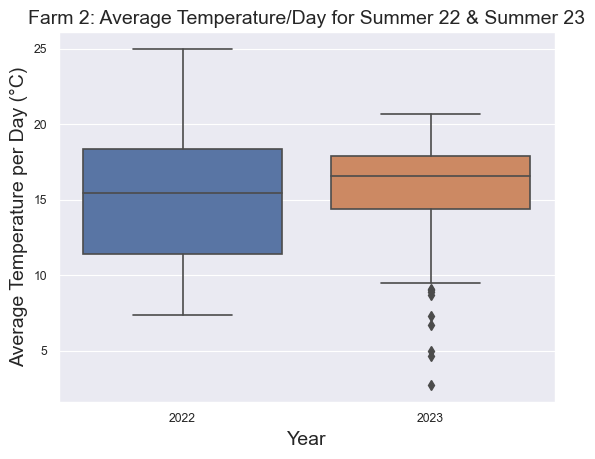

In [9]:
# Assuming selected_farm_data has a 'Temperature' column and is already loaded
selected_farm_data.sort_values(['AnimalNumber', 'StartDate'], inplace=True)

# Add 'Year' column
selected_farm_data['Year'] = selected_farm_data['StartDate'].dt.year

# Calculate the average temperature per day
average_daily_temperature = selected_farm_data.groupby(['StartDate', 'Year'])['Temperatur'].mean().reset_index()

# Plot the boxplot for average daily temperature
sns.set_theme()
sns.set_context("paper")
sns.boxplot(data=average_daily_temperature, x='Year', y='Temperatur')
plt.title('Farm 2: Average Temperature/Day for Summer 22 & Summer 23', fontsize=14) # Change between the farm names
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature per Day (°C)', fontsize=14)
plt.show()

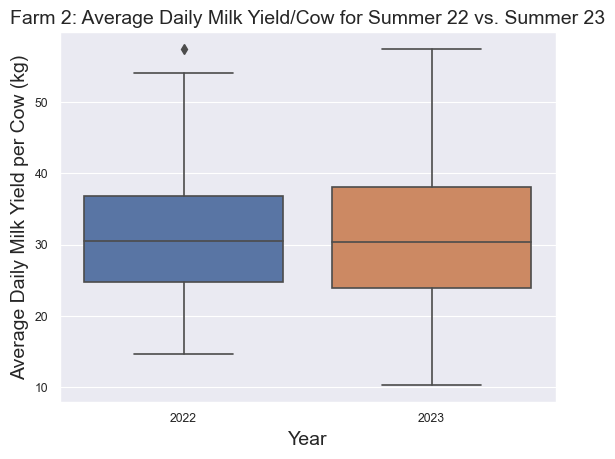

,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,TotalYield,DateTime,BreedName,Temperatur,Relativ fuktighet,Nederbörd,THI,THI_adj,HW,cum_HW,Year,DailyTotalYield
21952,f454e660,SE-f454e660-31,31,2022-05-01,17:59:00,7,250.0,3.97,2022-05-01 17:59:00,01 SRB,10.4,44.2,0.0,48.485768,55.90192,0,0.0,2022,16.51
43154,f454e660,SE-f454e660-31,31,2022-05-01,10:18:00,7,250.0,12.54,2022-05-01 10:18:00,01 SRB,11.3,42.0,0.0,50.534460,56.72980,0,0.0,2022,16.51
29176,f454e660,SE-f454e660-31,31,2022-05-02,18:04:00,7,251.0,6.86,2022-05-02 18:04:00,01 SRB,9.3,65.8,0.0,46.998194,46.89296,0,0.0,2022,15.73
47516,f454e660,SE-f454e660-31,31,2022-05-02,08:30:00,7,251.0,8.87,2022-05-02 08:30:00,01 SRB,10.3,58.9,0.0,48.853667,49.27662,0,0.0,2022,15.73
19602,f454e660,SE-f454e660-31,31,2022-05-03,09:52:00,7,252.0,13.56,2022-05-03 09:52:00,01 SRB,7.6,47.3,0.0,42.109048,49.32764,0,0.0,2022,19.78


In [10]:
# Calculate the total yield for each cow each day
selected_farm_data['DailyTotalYield'] = selected_farm_data.groupby(['AnimalNumber', 'StartDate'])['TotalYield'].transform('sum')
# Aggregate data to daily level per cow
daily_per_cow_data = selected_farm_data.groupby(['Year', 'AnimalNumber']).agg({'DailyTotalYield': 'mean'}).reset_index()

# Plot the boxplot for average daily total yield
sns.set_theme()
sns.set_context("paper")
sns.boxplot(data=daily_per_cow_data, x='Year', y='DailyTotalYield')
plt.title('Farm 2: Average Daily Milk Yield/Cow for Summer 22 vs. Summer 23', fontsize=14) # Change between the farm names
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Daily Milk Yield per Cow (kg)', fontsize=14)
plt.show()
selected_farm_data.head()

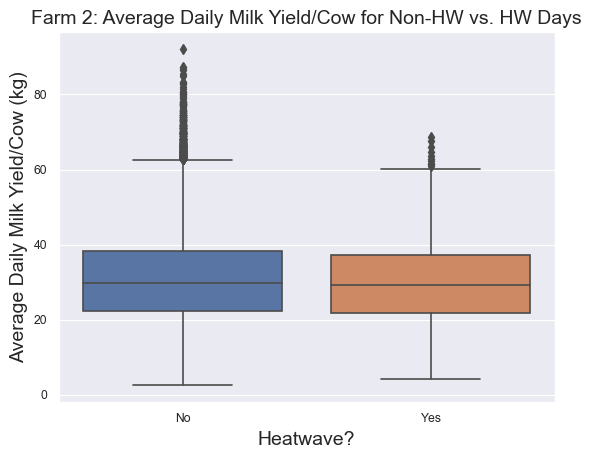

F-statistic: 10.112966745733086, p-value: 0.0014734874264956974


In [11]:
# Re-attempt the grouping and aggregation
average_daily_yield_hw = selected_farm_data.groupby(['StartDate', 'AnimalNumber']).agg({
    'DailyTotalYield': 'mean',
    'HW': 'max'
}).reset_index()

# Map the 'HW' column to strings for visualization
average_daily_yield_hw['HW'] = average_daily_yield_hw['HW'].map({0: 'No', 1: 'Yes'})

# Now create the boxplot to compare the TotalYield during heatwave and non-heatwave days
sns.set_theme()
sns.set_context("paper")
sns.boxplot(x='HW', y='DailyTotalYield', data=average_daily_yield_hw)

# Set plot labels and title
plt.title('Farm 2: Average Daily Milk Yield/Cow for Non-HW vs. HW Days', fontsize=14) # Change between the farm names
plt.xlabel('Heatwave?', fontsize=14)
plt.ylabel('Average Daily Milk Yield/Cow (kg)', fontsize=14)

# Show the plot
plt.show()

# ANOVA test
anova_results = stats.f_oneway(
    average_daily_yield_hw[average_daily_yield_hw['HW'] == 'No']['DailyTotalYield'],
    average_daily_yield_hw[average_daily_yield_hw['HW'] == 'Yes']['DailyTotalYield']
)

# Print the F-statistic and the p-value
print(f"F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")

farm 1: F-statistic: 1.3130837814814613, p-value: 0.25184698089863644
farm 2: F-statistic: 10.112966745733086, p-value: 0.0014734874264956974